# Avocado Assignment

In [181]:
from IPython.display import Image
Image(url= "https://afm-6b83.kxcdn.com/wp-content/uploads/2016/11/avocado-hub.jpg")

# Prediction of Average Prices of Avocado 

## Context
#### It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.
#### Clearly, they aren't buying home because they are buying too much Avocado Toast!
#### But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

## Content
#### The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

## Columns in our dataset
#### index
#### Date: The date of the observation
#### AveragePrice: The average price of a single avocado
#### Total Volume: Total number of avocados sold
#### 4046: Total number of avocados with PLU 4046 sold
#### 4225: Total number of avocados with PLU 4225 sold
#### 4770: Total number of avocados with PLU 4770 sold
#### Total Bags
#### Small Bags
#### Large Bags
#### XLarge Bags
#### type: conventional or organic
#### year: The year
#### region: The city or region of the observation

In [57]:
import pandas as pd
dataset = pd.read_csv('avocado.csv')
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### We are using the pandas library to read the the csv file named avocado.The file contains information on the following features: • Date - The date of the observation • AveragePrice - the average price of a single avocado • Total Volume - Total number of avocados sold • 4046 - Total number of avocados with PLU 4046 sold • 4225 - Total number of avocados with PLU 4225 sold • 4770 - Total number of avocados with PLU 4770 sold • Total Bags • Small Bags • Large Bags • XLarge Bags • type - conventional or organic • year - the year • region - the city or region of the observation

In [179]:
# importing necessaries libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# preprocession, normalizing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.model_selection import train_test_split,GridSearchCV

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc



import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [59]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

#### The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !

In [60]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [61]:
dataset.shape

(18249, 13)

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### Well as a first observation we can see that we are lucky, we dont have any missing values (16468 complete data) and 13 columns. Now let's do some Feature Engineering on the Date Feature so we can be able to use the day and the month columns in building our machine learning model later.

In [63]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### Here we add two more columns month and day where 6 in Month implies the month "June" & 15 in Day implies the 15th day of a month.

In [64]:
#checking the value counts of each type
dataset.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [65]:
#co relation of total volume to total bag
dataset[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [66]:
#checking the average year of volume of avacado per year
dataset.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [67]:
#finding how much type of avacado is sell in last 2 year
dataset.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [68]:
#total no of sale in each year of  2 years
dataset.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

<AxesSubplot:>

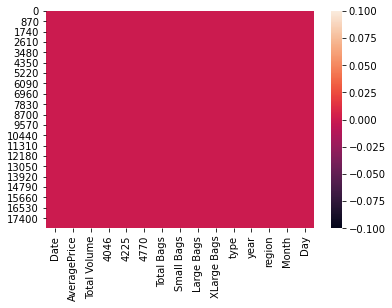

In [70]:
#checking null values using heatmap
sns.heatmap(dataset.isnull())

In [71]:
dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


### Above statatics data show that there multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
### Also, number of rows in each column are same, means there are no null values in the data set.
### Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
### Most of the column statistics data are near to 0 values.
### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.¶

In [72]:
# removing the duplicates

dataset.drop_duplicates(inplace = True)
dataset.shape

(18249, 15)

### Data Visualization:

### Bar plot

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

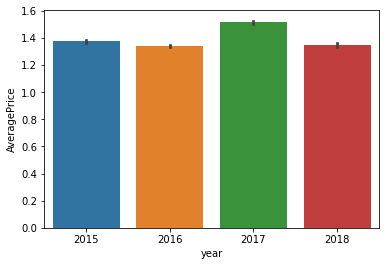

In [73]:
# checking the ratio of year and price that which year have a maximum average price.

sns.barplot(x="year",y="AveragePrice",data=dataset)

#### From above we came to know that:
#### Year 2016 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

### Count plot

C:\Users\Sunil Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

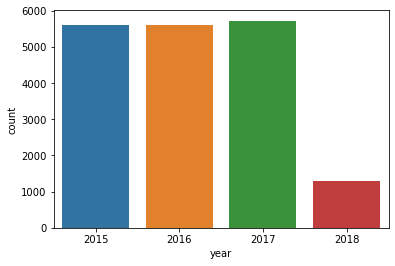

In [74]:
# i am using this count plot to visualize the year column

sns.countplot("year",data=dataset)

#### From above count plot we came to know that:
#### 2017 have maximum value 5722 and 2018 have minimum value 1296.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

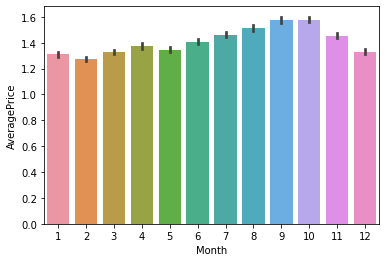

In [77]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=dataset)

#### september and october is the month where max no og average price is there

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

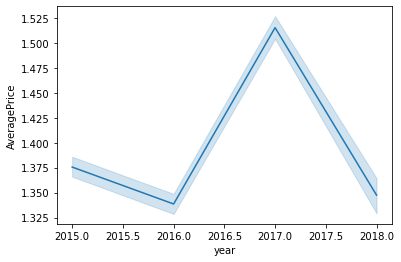

In [78]:
# lineplot
sns.lineplot(x = 'year', y = 'AveragePrice', data=dataset)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

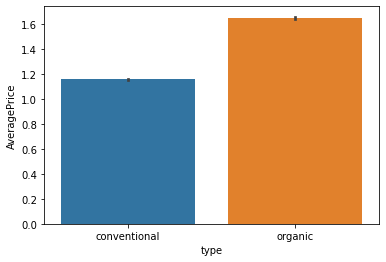

In [79]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice" ,data=dataset)

### Analysis of Average Prices

Text(0.5, 1.0, 'Average Price')

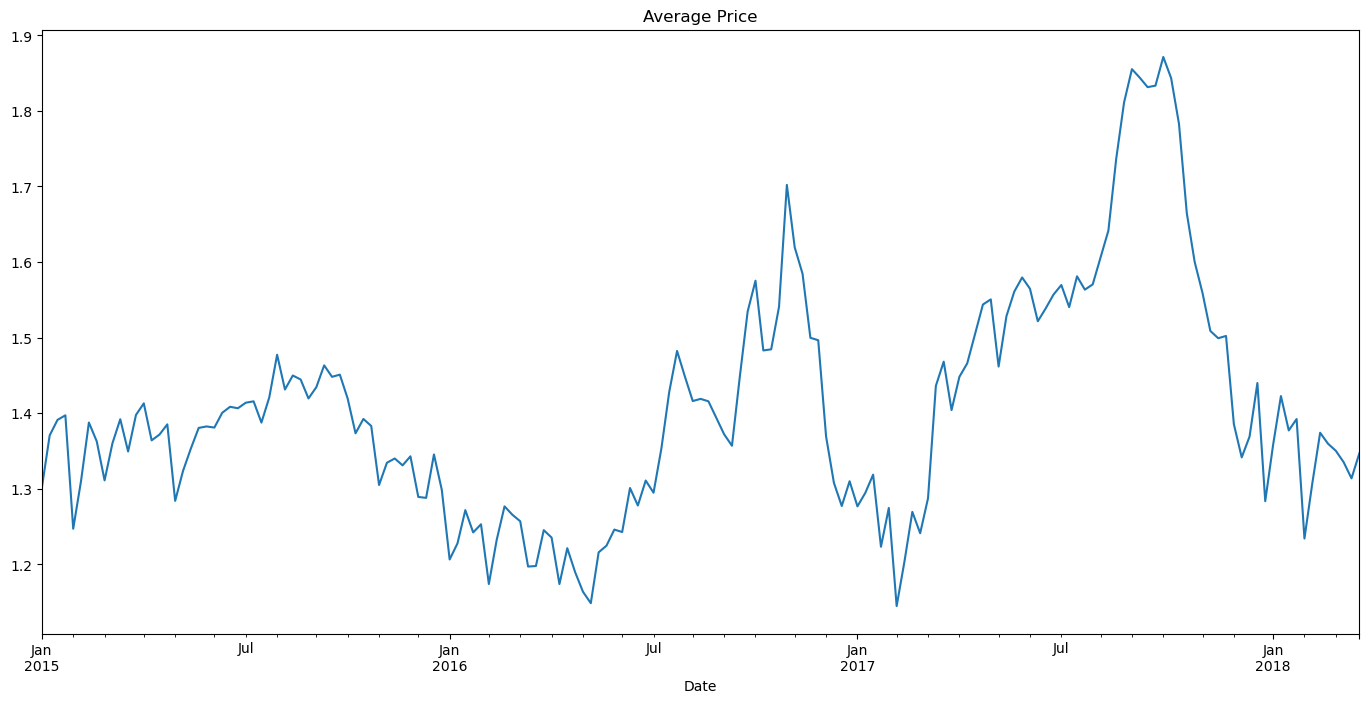

In [80]:
import matplotlib.pyplot as plt

byDate=dataset.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

#### Hence the plot shows the average price of avocado at various points of time

Text(0.5, 1.0, 'Average Price Per Month')

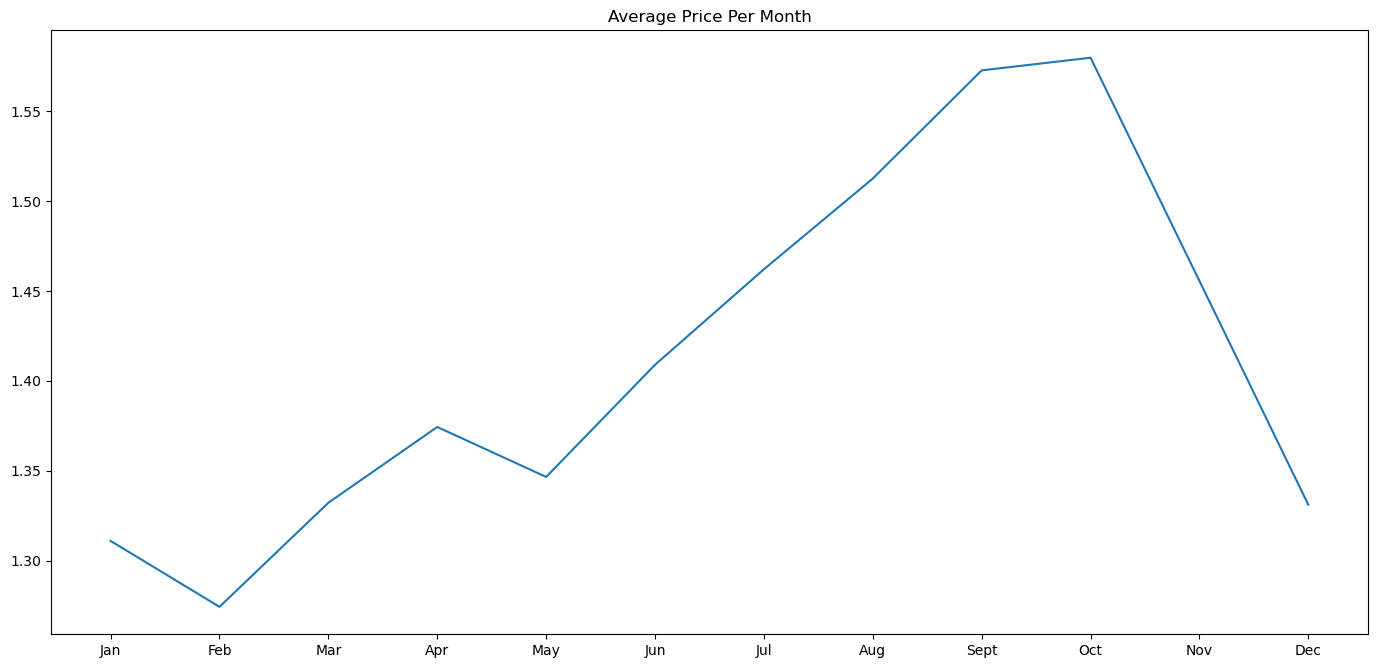

In [81]:
byMonth = dataset.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

#### From the above graph plotted for average price of avocado per month we can observe that the price rises for a while in February to March then it falls in April and then the month of May witnesses a rise in the average price. This rise reaches its zenith in the month of October and henceforth it starts to fall.

Text(0.5, 1.0, 'Average Price Per Day')

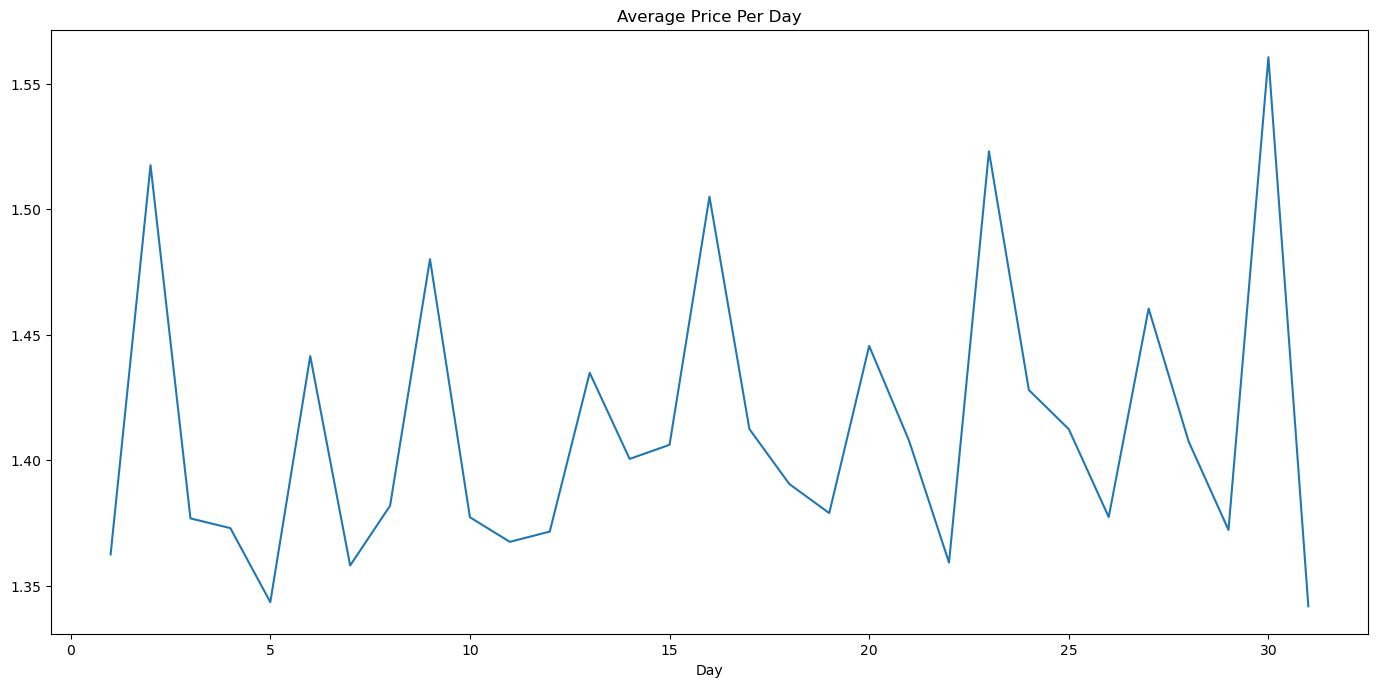

In [84]:
byDay = dataset.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

#### The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.

Text(0.5, 1.0, 'Average Price According to Region')

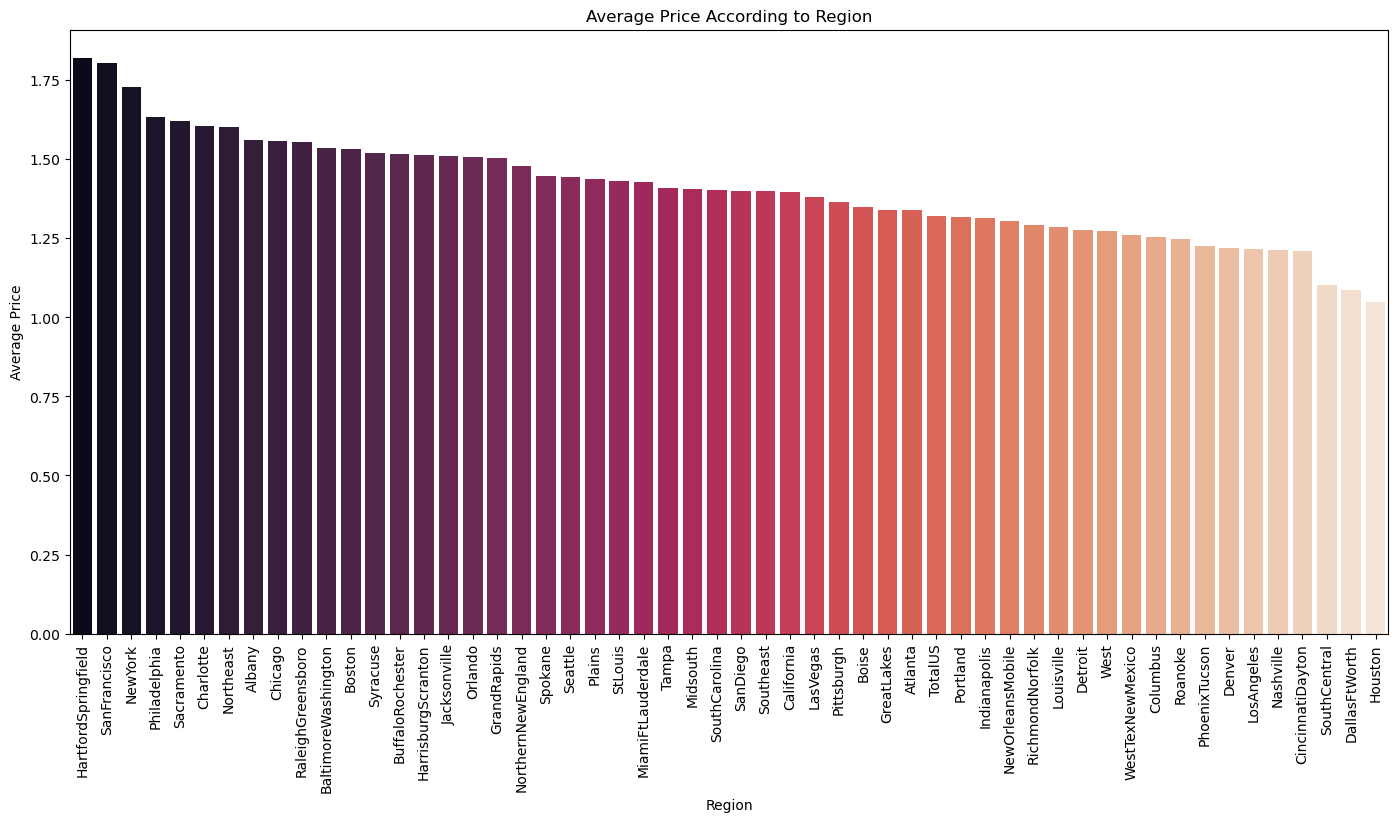

In [85]:
byRegion=dataset.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

##### The barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

## Histogram Plot

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

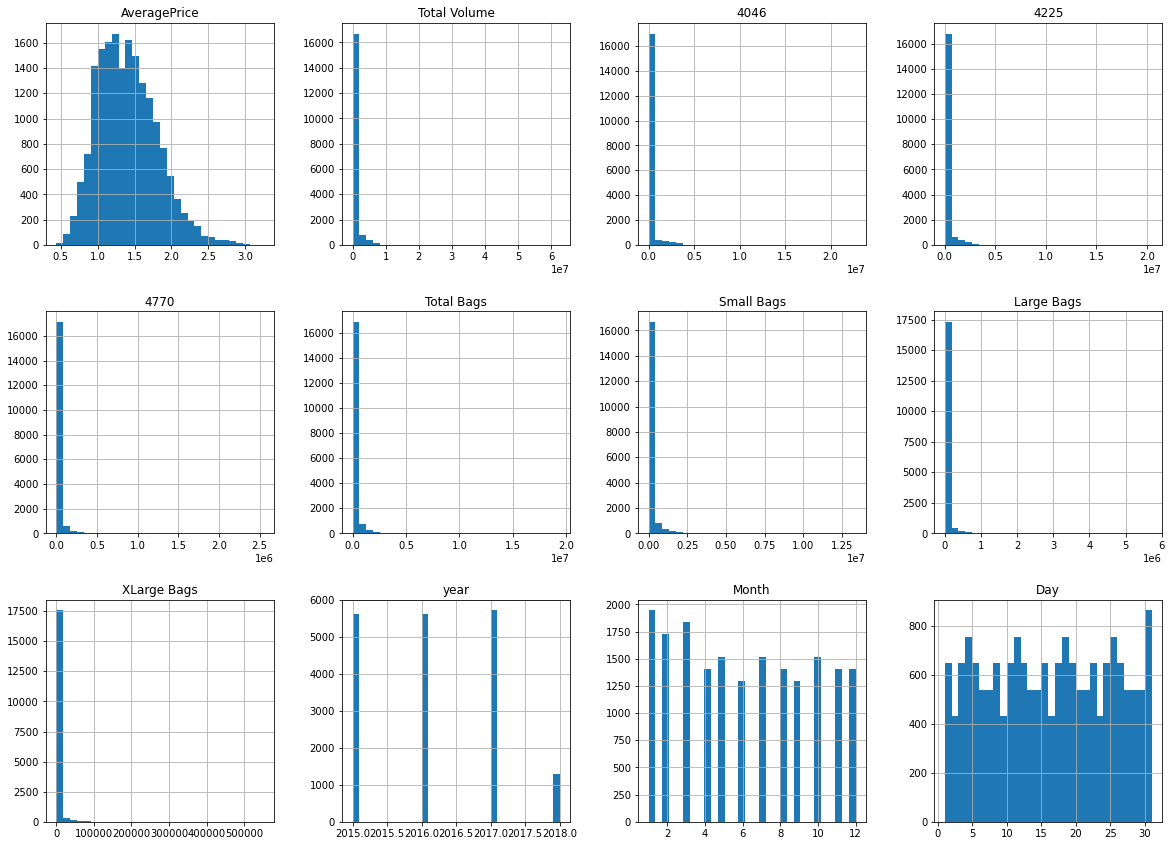

In [86]:
# ploting histogram to check the skewness

dataset.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

#### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).
#### Average price column is normally distributing over the histogram.
#### Rest of the data are not much varying in term of numbers, so they are almost left skewed data
#### To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.
#### Out of this dataset i have analyzed 9 columns is continous and 1 columns is categorical data.

In [92]:
q = dataset['AveragePrice'].quantile(0.98)
# we are removing the top 2% data from the pregnancies column

dataset_cleaned = dataset[dataset['AveragePrice']<q]
q = dataset_cleaned['Total Volume'].quantile(0.98)
# we are removing the top 1% data from the Total Volume column

dataset_cleaned = dataset_cleaned[dataset_cleaned['Total Volume']<q]
q = dataset_cleaned['4046'].quantile(0.98)

# we are removing the top 1% data from the 4046 column
dataset_cleaned = dataset_cleaned[dataset_cleaned['4046']<q]
q = dataset_cleaned['4225'].quantile(0.98)

# we are removing the top 1% data from the 4225 column
dataset_cleaned = dataset_cleaned[dataset_cleaned['4225']<q]
q = dataset_cleaned['Total Bags'].quantile(0.98)

# we are removing the top 1% data from the Total Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['Total Bags']<q]
q = dataset_cleaned['Small Bags'].quantile(0.98)

# we are removing the top 1% data from the Small Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['Small Bags']<q]
q = dataset_cleaned['Large Bags'].quantile(0.98)

# we are removing the top 1% data from the Large Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['Large Bags']<q]
q = dataset_cleaned['XLarge Bags'].quantile(0.99)

# we are removing the top 1% data from the Large Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['XLarge Bags']<q]
q = dataset_cleaned['4770'].quantile(0.99)

# we are removing the top 1% data from the 4770 column
dataset_cleaned = dataset_cleaned[dataset_cleaned['4770']<q]

### Cleaned the skewness from different columns

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

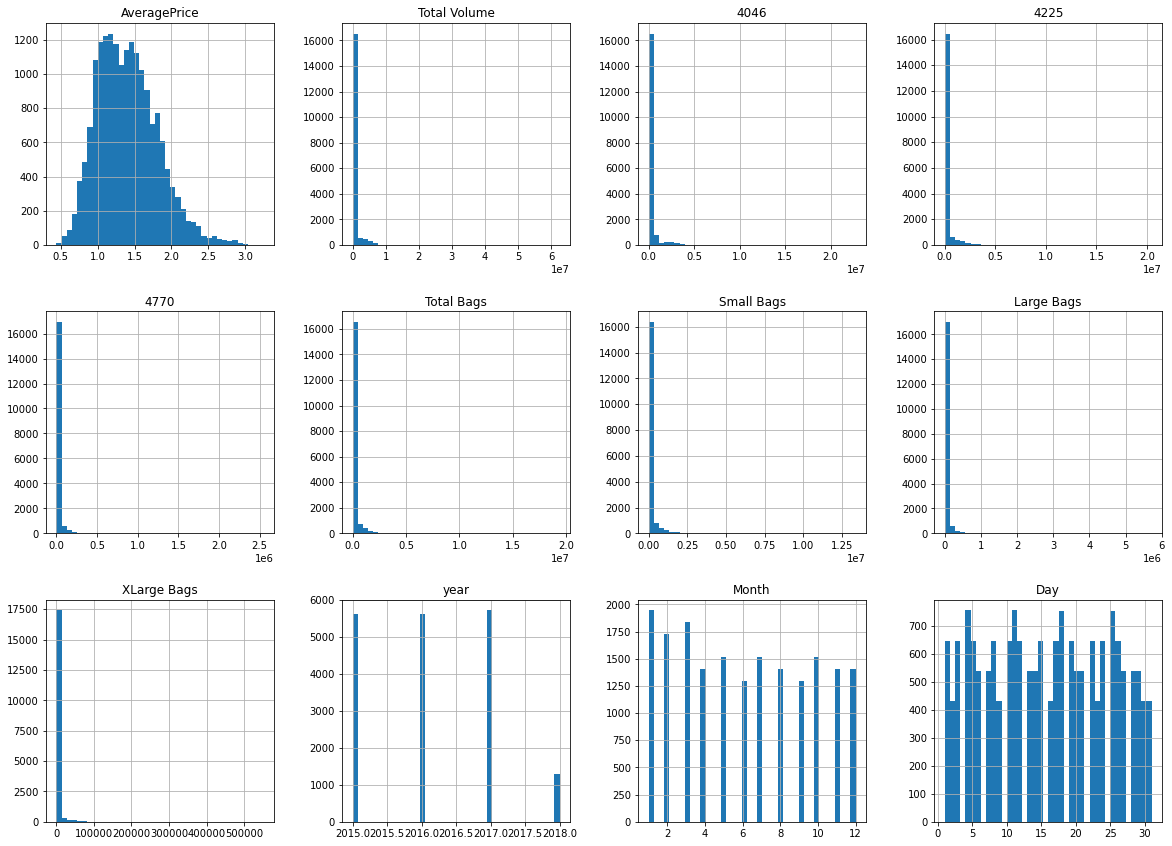

In [93]:
# ploting histogram to check the skewness

dataset.hist(figsize=(20,20),grid=True,layout=(4,4),bins=40)

### After clearing the skewness i can see that the dataset which is plotted in above histogram is normally distributed.

In [96]:
# replacing all the zero values in different columns
# mean
dataset['Date'] = dataset['Date'].replace(0,dataset['Date'].mean())
dataset['AveragePrice'] = dataset['AveragePrice'].replace(0,dataset['AveragePrice'].mean())
dataset['Total Volume'] = dataset['Total Volume'].replace(0,dataset['Total Volume'].mean())
dataset['4046'] = dataset['4046'].replace(0,dataset['4046'].mean())
dataset['4225'] = dataset['4225'].replace(0,dataset['4225'].mean())
dataset['4770'] = dataset['4770'].replace(0,dataset['4770'].mean())
dataset['Total Bags'] = dataset['Total Bags'].replace(0,dataset['Total Bags'].mean())
dataset['Small Bags'] = dataset['Small Bags'].replace(0,dataset['Small Bags'].mean())
dataset['Large Bags'] = dataset['Large Bags'].replace(0,dataset['Large Bags'].mean())
dataset['XLarge Bags'] = dataset['XLarge Bags'].replace(0,dataset['XLarge Bags'].mean())

# mode
dataset['year'] = dataset['year'].replace(0,dataset['year'].mode()[0])
dataset['type'] = dataset['type'].replace(0,dataset['type'].mode()[0])
dataset['region'] = dataset['region'].replace(0,dataset['region'].mode()[0])

### Replacing all the zero values from different columns

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

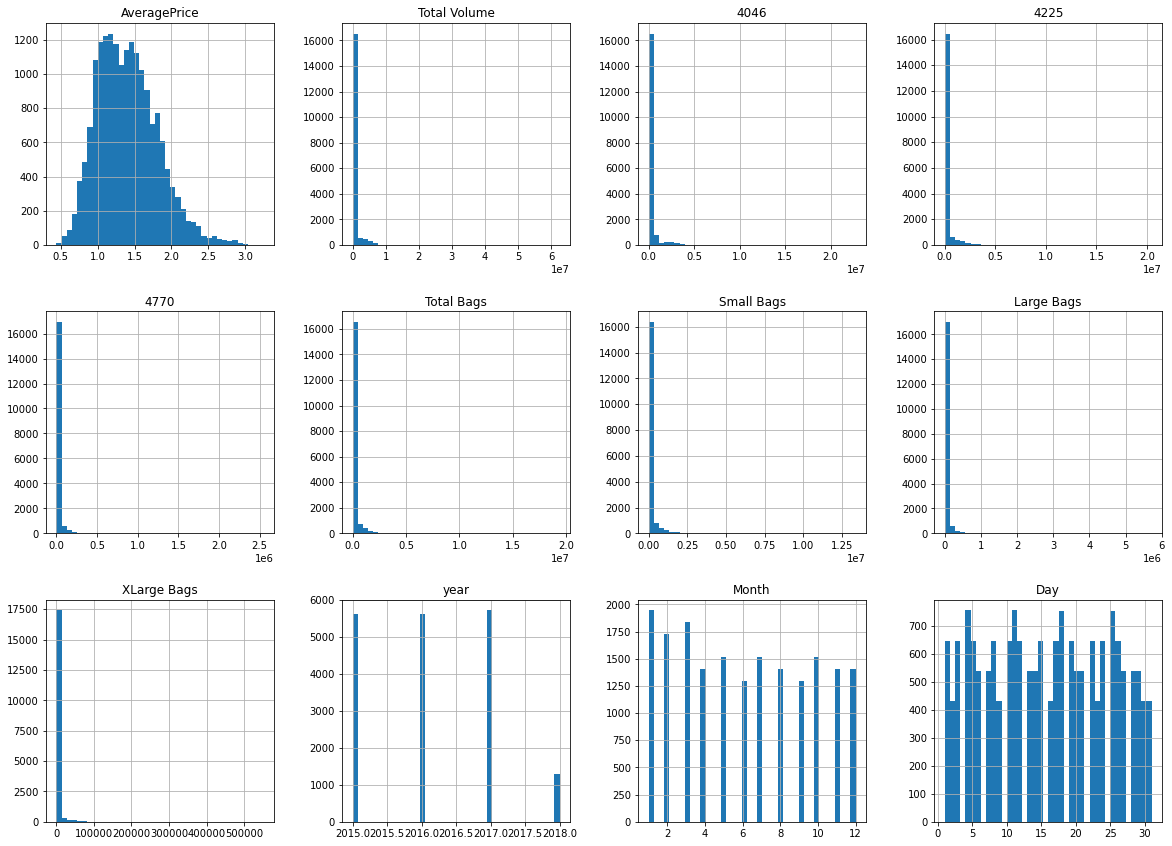

In [101]:
# ploting histogram to check the skewness

dataset.hist(figsize=(20,20),grid=True,layout=(4,4),bins=40)

### After clearing the skewness i can see that the dataset which is plotted in above histogram is normally distributed.

## Factor Plot

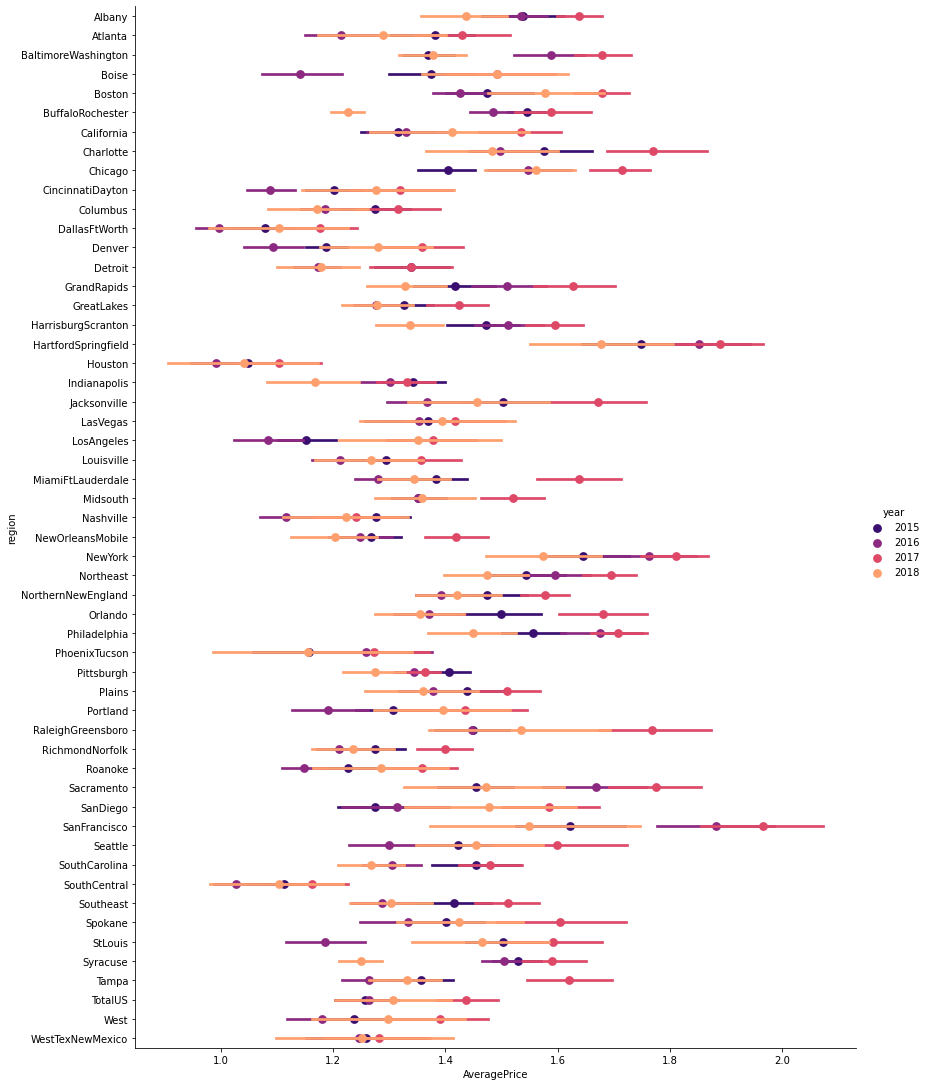

In [99]:
sns.factorplot('AveragePrice','region',data=dataset,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

#### A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page. The underlying plot generated can be any univariate or bivariate plot. The scatter plot is the most common application. The above plot is a factor plot of average avocado price for different regions classified by year.

## Box plot

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

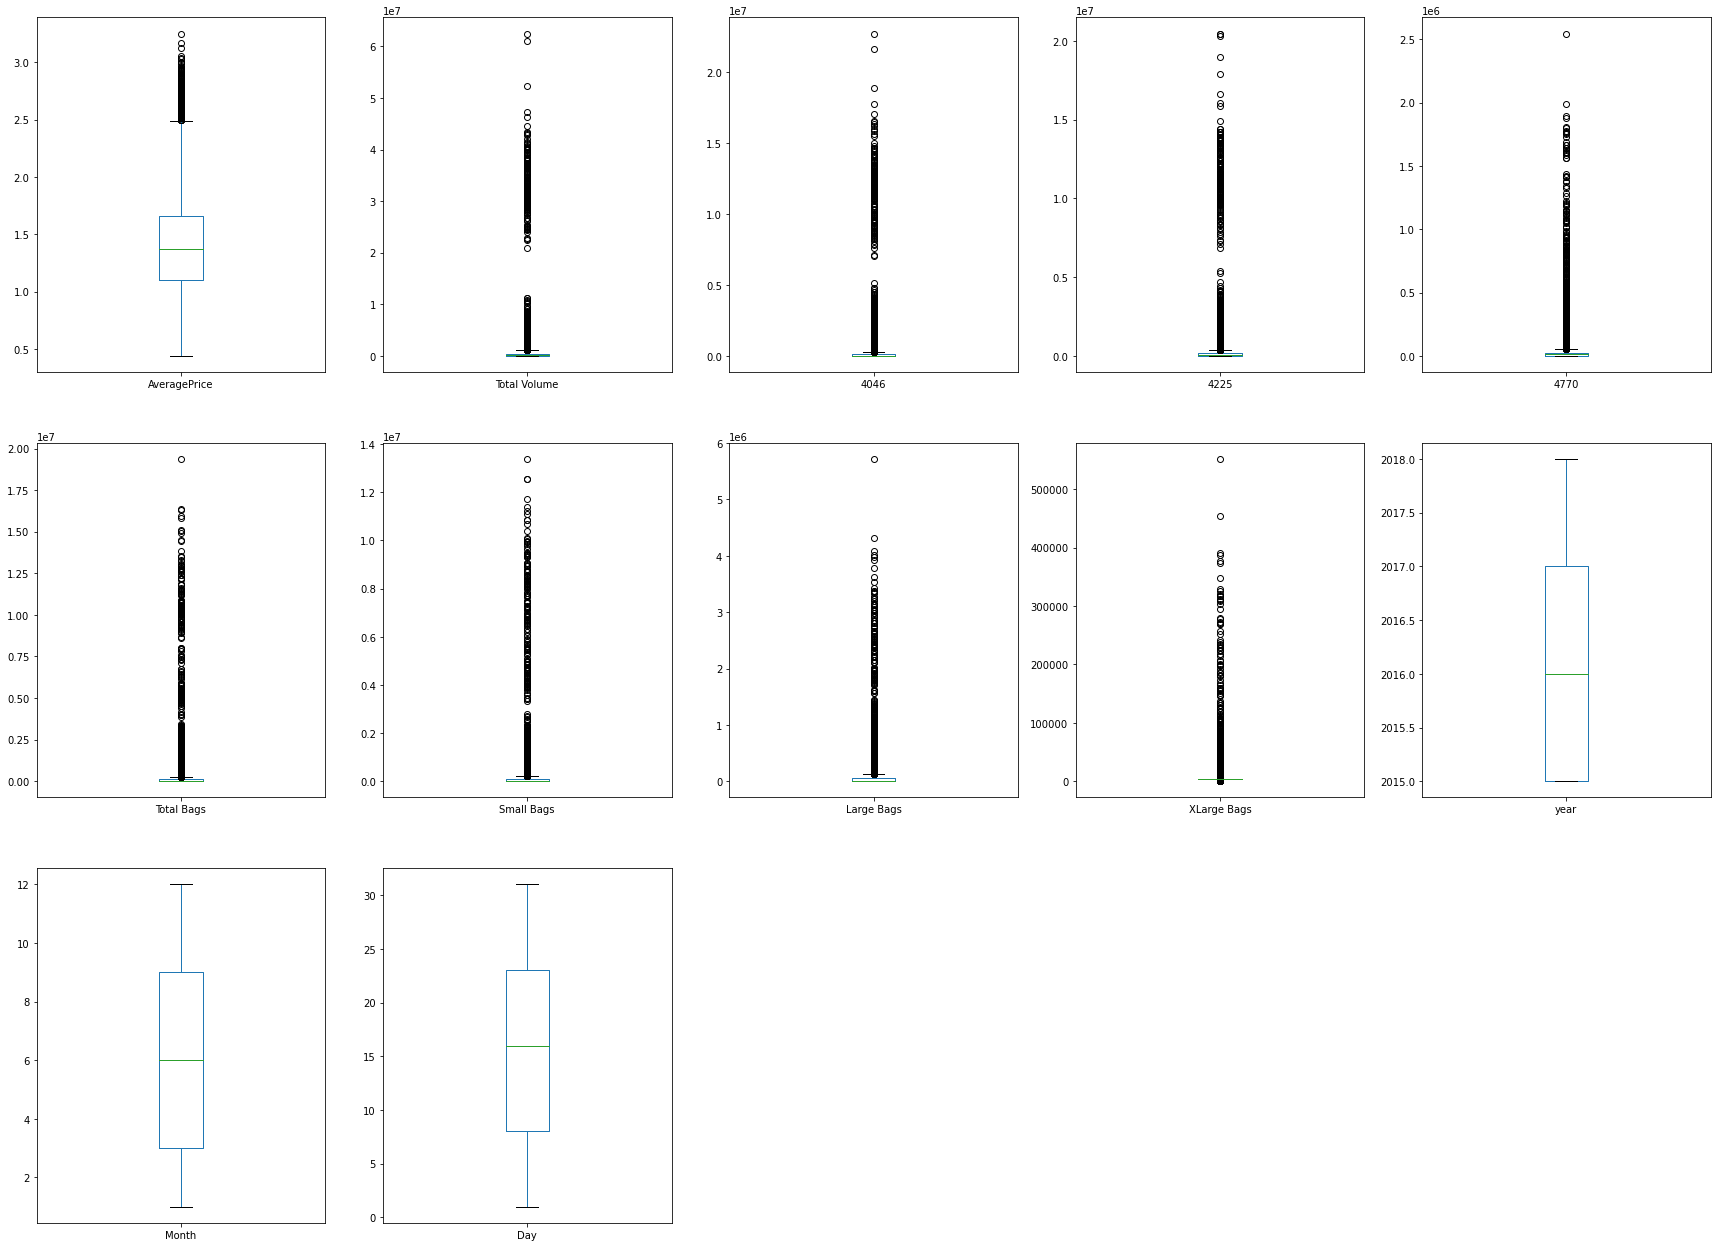

In [102]:
dataset.plot(kind='box',subplots=True,layout=(4,5),figsize=(30,30))

#### From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
#### So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i will be using z score below to remove outliers
#### Clearly the boxplot indicates that all the variables contains outliers. Now we need to take care of the outliers.

In [106]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    dataset[i] = le.fit_transform(dataset[i].astype(str))

print(dataset.dtypes)

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object


In [107]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29


In [112]:
# finding out the z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(dataset))
print(z)

[[0.18630549 0.60712774 0.69418346 ... 1.7002522  1.64763162 1.29185687]
 [0.13572583 0.63241146 0.69749425 ... 1.7002522  1.64763162 0.49423066]
 [1.19789867 0.46129887 0.69639431 ... 1.7002522  1.64763162 0.30339555]
 ...
 [1.17934532 0.74346476 0.69276602 ... 1.70081131 1.46495942 0.60817726]
 [1.33108429 0.73687762 0.68969957 ... 1.70081131 1.46495942 0.18944895]
 [0.54709957 0.7334081  0.67721182 ... 1.70081131 1.46495942 0.98707516]]


## Heatmap

[]

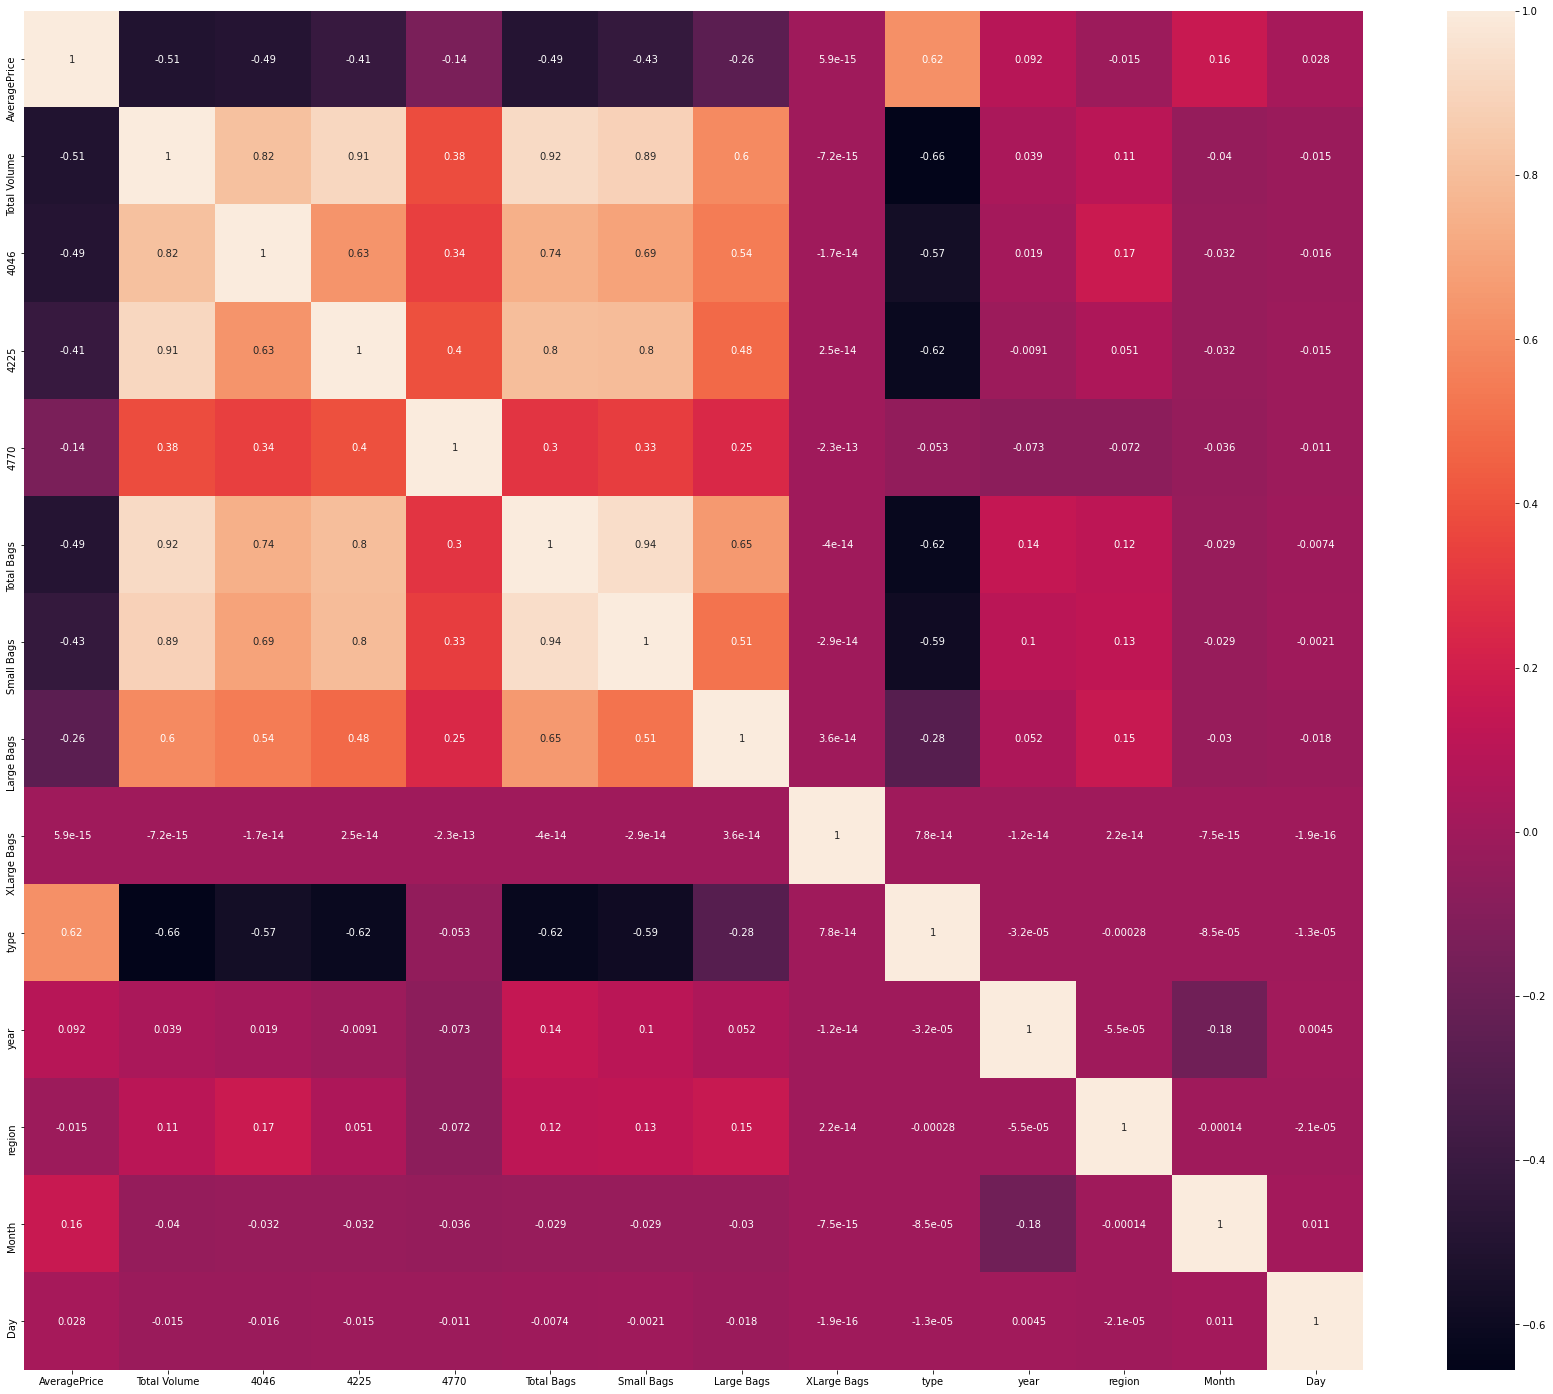

In [113]:
#checking the co-relation of all column to each other
dataset_cor = dataset.corr()
plt.figure(figsize=(30,25))
sns.heatmap(dataset_cor,annot=True)
plt.plot()

### As year is most negative co related column among all columns and also the difference is very close of each column

In [115]:
threshold = 3
print(np.where(z<3))
print(dataset.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [116]:
#Assign the value to df_new which are less the threshold value and removing the outliers
dataset_new = dataset[(z<3).all(axis = 1)]

In [117]:
print(dataset.shape)
print(dataset_new.shape)
dataset = dataset_new
print('Shape after removing outlires',dataset.shape)

(18249, 14)
(18249, 14)
Shape after removing outlires (18249, 14)


In [126]:
#now finding the mean value of each column 
print(dataset['4225'].mean())
print(dataset['Total Bags'].mean())
print(dataset['Small Bags'].mean())

101069.04318810086
78311.47691112047
60006.823693066624


In [127]:
#replace the outlier value to its mean value to remove outliers
dataset.loc[dataset['4225']<4.8,'4225'] = np.mean(dataset['4225'])
dataset.loc[dataset['Total Bags']<4.8,'Total Bags'] = np.mean(dataset['Total Bags'])
dataset.loc[dataset['Small Bags']<4,'Small Bags'] = np.mean(dataset['Small Bags'])

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

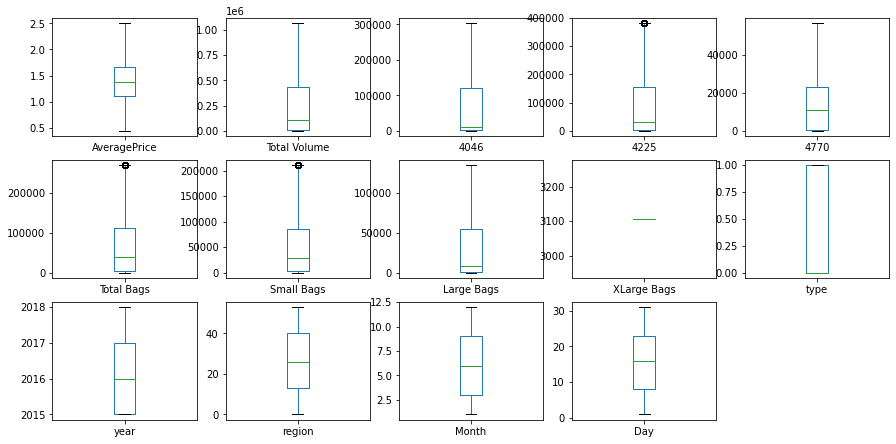

In [128]:
#plotting the boxplot of each column to check the outliers 
dataset.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [129]:
print(dataset.shape)
print(dataset_new.shape)
dataset = dataset_new
print('Shape after removing outlires',dataset.shape)

(18249, 14)
(18249, 14)
Shape after removing outlires (18249, 14)


In [130]:
dataset.skew()

AveragePrice    0.453073
Total Volume    1.206542
4046            1.243711
4225            1.218767
4770            1.178511
Total Bags      1.157730
Small Bags      1.167580
Large Bags      1.501371
XLarge Bags     0.000000
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

In [132]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if dataset.skew().loc[col]>0.55:
        dataset[col] = np.log1p(dataset[col])

In [133]:
dataset.skew()

AveragePrice    0.453073
Total Volume   -0.286615
4046           -0.513203
4225           -0.695082
4770           -0.894633
Total Bags     -0.627372
Small Bags     -0.718452
Large Bags     -0.802042
XLarge Bags     0.000000
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

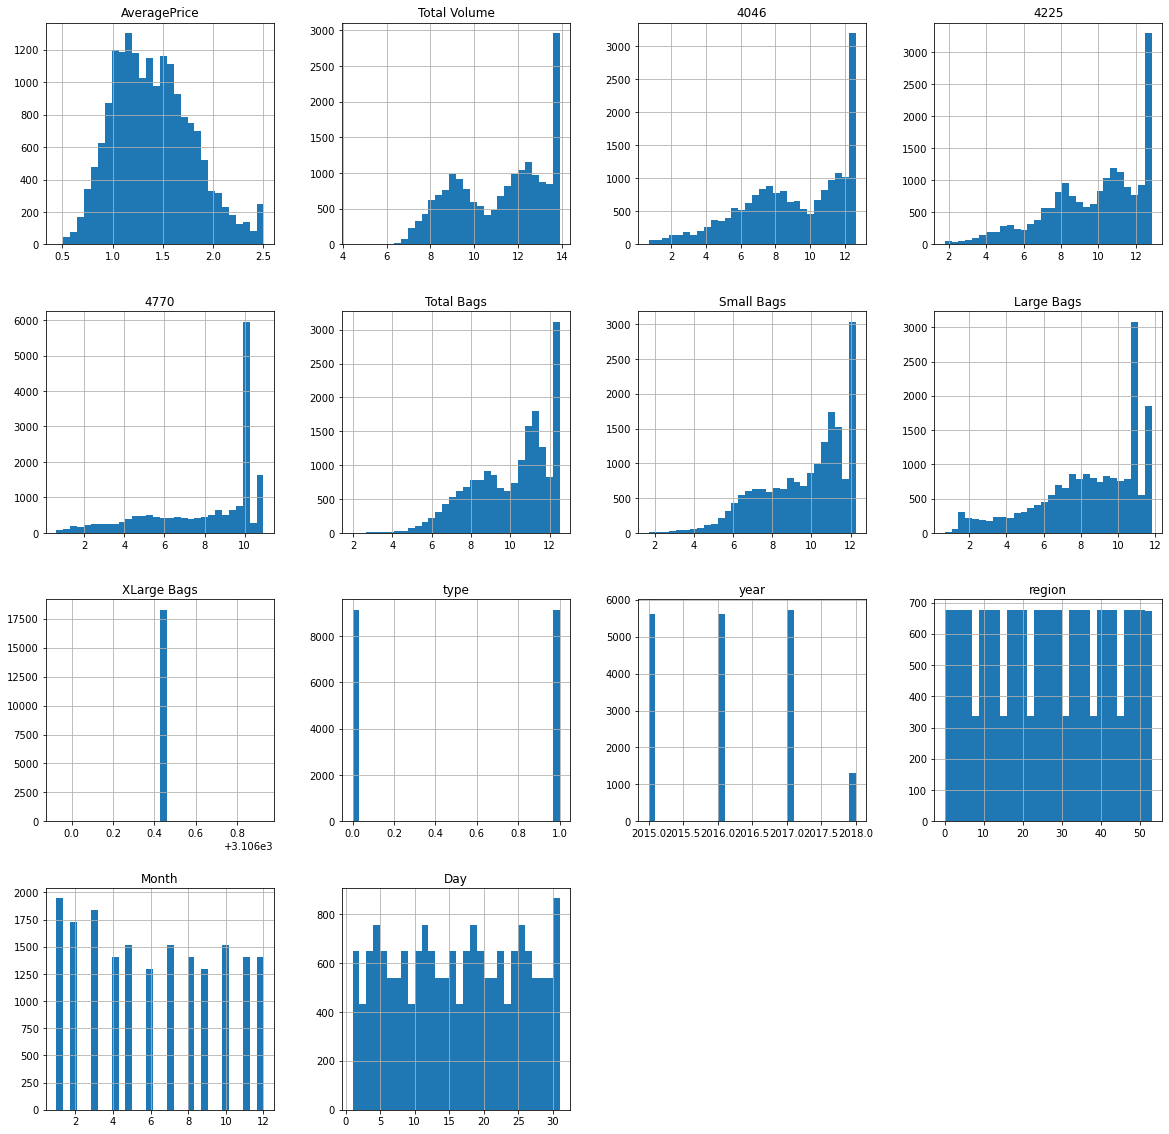

In [134]:
#plotting histogram for univariate analysis and checking the Normal Distribution
dataset.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

#### Average price, total bags and total volume is well normally distributed data among all column

## Model uilding

In [161]:
#assign the value of x and y for training and testing phase
X = dataset.drop(columns=['AveragePrice'])
y = dataset[["AveragePrice"]]
print(x.shape)
print(y.shape)

(18249, 13)
(18249, 1)


### Standard scaler

In [162]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-0.05018082, -0.68908958,  0.44514041, ..., -1.7002522 ,
         1.64763162,  1.29185687],
       [-0.12656592, -0.83398812,  0.36755803, ..., -1.7002522 ,
         1.64763162,  0.49423066],
       [ 0.24568815, -0.77865048,  0.71654768, ..., -1.7002522 ,
         1.64763162, -0.30339555],
       ...,
       [-0.79729299, -0.64209365, -0.76476801, ...,  1.70081131,
        -1.46495942,  0.60817726],
       [-0.71819708, -0.55847154, -0.6886651 , ...,  1.70081131,
        -1.46495942, -0.18944895],
       [-0.68120315, -0.34302253, -0.78045473, ...,  1.70081131,
        -1.46495942, -0.98707516]])

### VIF : variance inflation factor

In [163]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,26.564976,Total Volume
1,3.782138,4046
2,5.781084,4225
3,1.034739,4770
4,12.333634,Total Bags
5,5.828188,Small Bags
6,1.272989,Large Bags
7,1.000000,XLarge Bags
8,3.184695,type
9,1.240690,year


#### The above code snippet calculates the variable inflation factor for the displayed variables.

### DecisionTreeRegressor
### KNeighborsRegressor
### AdaBoostRegressor
### LinearRegression
### GradientBoostingRegressor

In [143]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.7303906590224876
R2 score correspond to random state  40 is 0.6038392368570675
R2 score correspond to random state  40 is 0.5589599574652719
R2 score correspond to random state  40 is 0.5293837568787096
R2 score correspond to random state  40 is 0.7323655701941998
R2 score correspond to random state  41 is 0.7508564236744937
R2 score correspond to random state  41 is 0.6225572462676754
R2 score correspond to random state  41 is 0.5738247879166555
R2 score correspond to random state  41 is 0.5486246775318203
R2 score correspond to random state  41 is 0.7505702568404469
R2 score correspond to random state  42 is 0.7443012453915567
R2 score correspond to random state  42 is 0.6066418764384807
R2 score correspond to random state  42 is 0.5474658000340545
R2 score correspond to random state  42 is 0.5369009986151272
R2 score correspond to random state  42 is 0.7371389887089793
R2 score correspond to random state  43 is 0.726899224007823
R2 score 

#### Splitting our dataset to training and test numpy arrays with the names having their intended meaning. Where we are using 80% of our dataset for training and 20% of the data for testing.

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test = np.array(y_test,dtype = float)

#### The funtion regression_results defined below calculates and prints the following features of a model: explained_variance, r2, adjusted_r2, MAE, MSE, RMSE. It accepts the original and predicted values as its arguments.

In [167]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

In [168]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### Fitting Multiple Linear Regression Model

#### The following code snippet fits the multiple linear regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the multiple linear regression model.



In [169]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.5704
R2:  0.5702
Adjusted_r2:  0.5686
MAE:  0.2077
MSE:  0.0698
RMSE:  0.2641
Accuracy: 54.07 %
Standard Deviation: 1.43 %


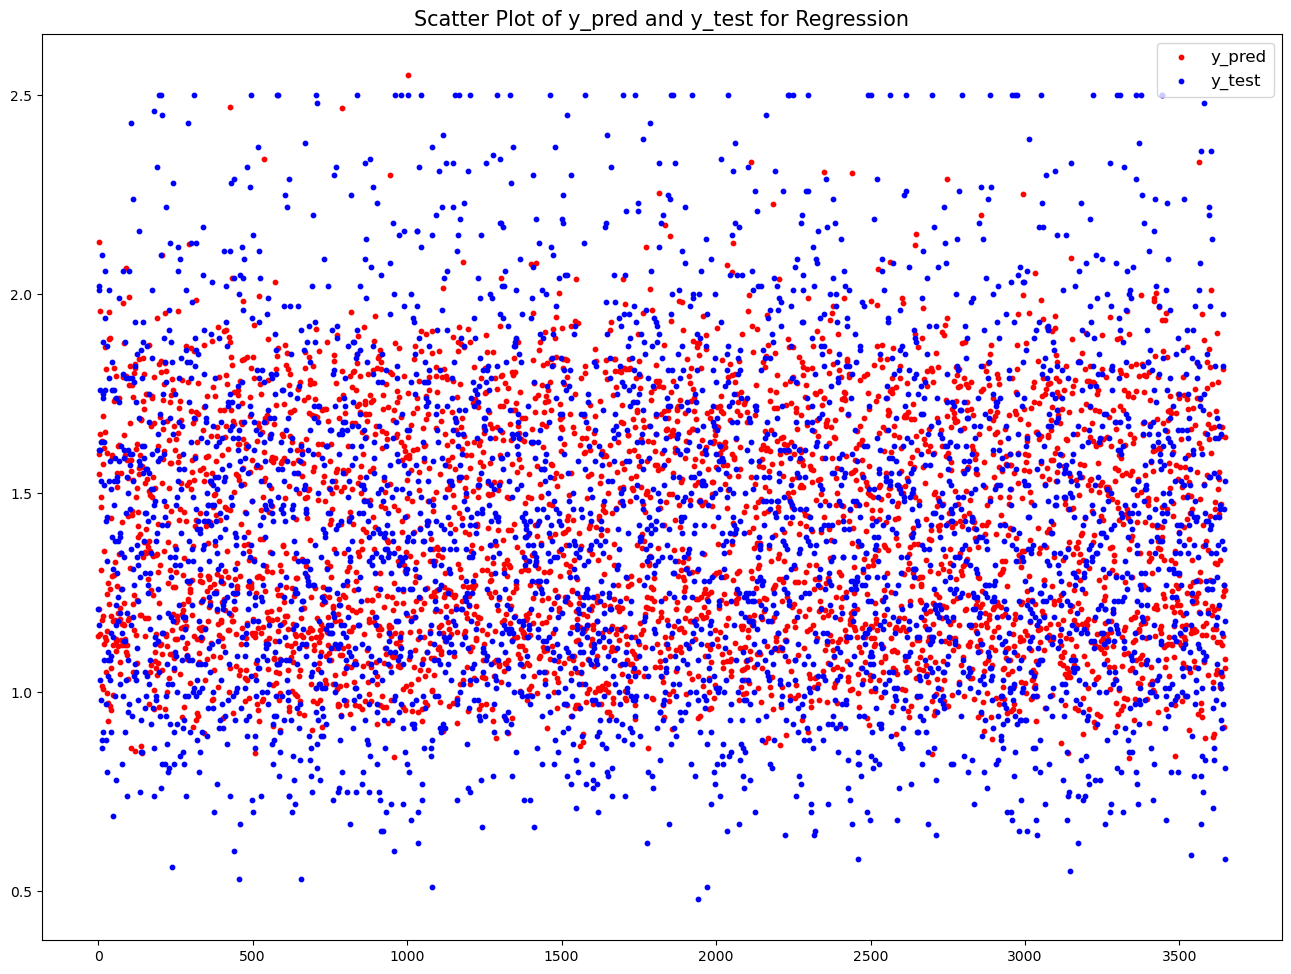

In [170]:
plt.figure(figsize=(16, 12),dpi=100)
red = plt.scatter(range(len(X_test)),y_pred,c='r',s = 10)
blue = plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

### The above scatterplot comprises of the original and predicted values of the multiple linear regression model.

### Fitting Random Forest Regression Model

#### The following code snippet fits the random forest regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_rf. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the random forest regression model.

In [171]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(classifier)

Explained_variance:  0.8997
R2:  0.8997
Adjusted_r2:  0.8993
MAE:  0.0908
MSE:  0.0163
RMSE:  0.1276
Accuracy: 88.50 %
Standard Deviation: 0.55 %


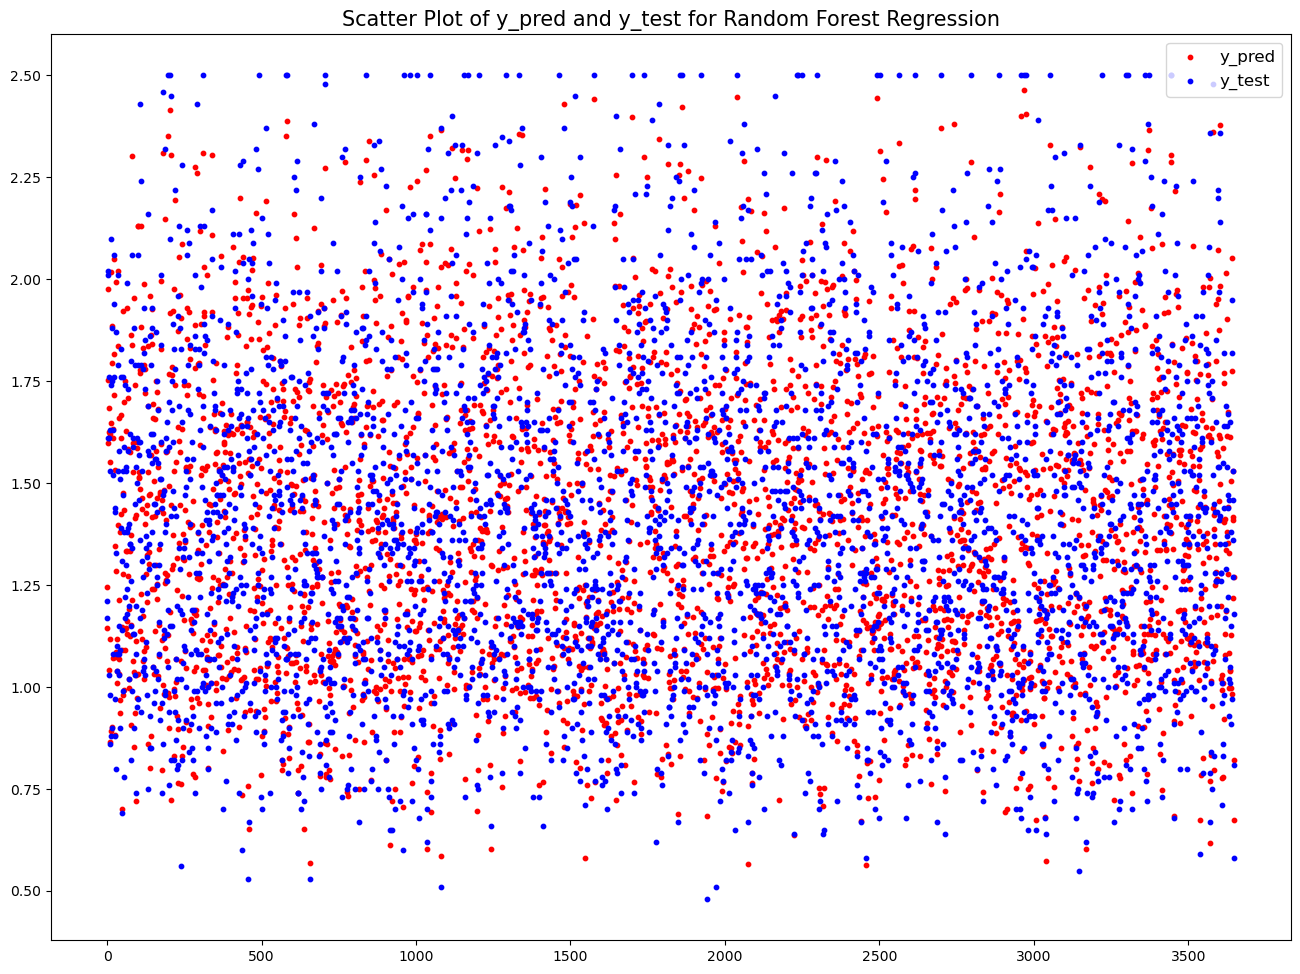

In [172]:
plt.figure(figsize=(16, 12),dpi=100)
red=plt.scatter(range(len(X_test)),y_pred_rf,c='r',s = 10)
blue=plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Random Forest Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

#### The above scatterplot comprises of the original and predicted values of the random forest regression model.

### Fitting Decision Tree Regression Model

#### The following code snippet fits the decision tree regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_dt. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the decision tree regression model.

In [173]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.7284
R2:  0.7283
Adjusted_r2:  0.7273
MAE:  0.1328
MSE:  0.0441
RMSE:  0.21
Accuracy: 73.07 %
Standard Deviation: 1.89 %


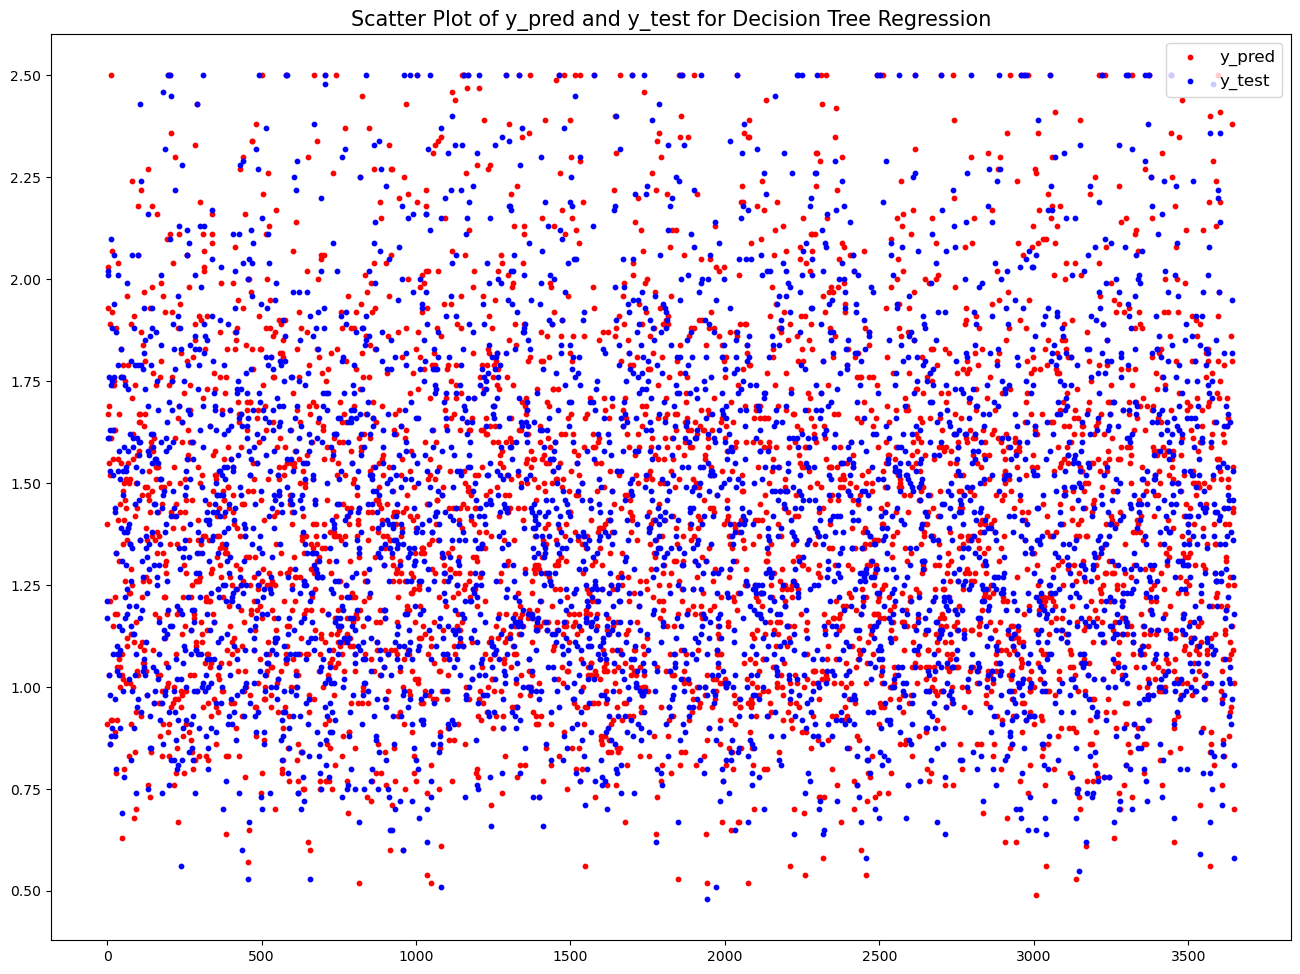

In [174]:
plt.figure(figsize=(16, 12),dpi=100)
red=plt.scatter(range(len(X_test)),y_pred_dt,c='r',s = 10)
blue=plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Decision Tree Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

### The above scatterplot comprises of the original and predicted values of the random forest regression model.

# Conclusion

In [175]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/KtCwOggGwgQ/maxresdefault.jpg")

### As conclusion I proclaim that, using k-fold cross validation as the basis for model selection we declare random forest model as the best suited model for our purpose of predicting average avocado prices.

# Saving the Best Model

In [176]:
import pickle

In [177]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(classifier,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))